## Pre-install packages
- Set default values:
  - Training Dates
  - Sock Symbols Allowed

In [1]:
start_training_date = '2020-01-01'
symbols = {
    "AAPL": "Apple Inc.",
    "NET": "Cloudflare Inc.",
    "SNOW": "Snowflake Inc.",
    "MSFT": "Microsoft Corporation",
    "META": "Meta Platforms Inc.",
    "TSLA": "Tesla Inc.",
    "DOX": "Amdocs Ltd",
    "CRM": "Salesforce Inc.",
    "ADBE": "Adobe Inc.",
    "F": "Ford Motor Co.",
    "T": "AT&T Inc.",
    "VZ": "Verizon Communications",
    "DOX": "Amdocs Ltd",
    "NVDA": "Nvidia Corporation",
}

In [2]:
%pip install yfinance 
%pip install pandas 
%pip install numpy 
%pip install scikit-learn 
%pip install matplotlib
%pip install holidays
%pip install yahoo_fin
%pip install boto3
%pip install sagemaker

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Data Collection

In [3]:
import yfinance as yf

# Download stock data from a specific start date until today
data = yf.download(list(symbols.keys()), start="2018-01-01")
data.tail()

[*********************100%***********************]  13 of 13 completed


Price        Adj Close                                                        \
Ticker            AAPL        ADBE         CRM        DOX      F        META   
Date                                                                           
2024-12-12  247.960007  474.630005  357.621948  88.440002  10.39  630.281555   
2024-12-13  248.130005  465.690002  353.906189  87.300003  10.39  619.849976   
2024-12-16  251.039993  461.529999  356.822876  87.180000   9.99  624.239990   
2024-12-17  253.479996  455.230011  350.570007  86.919998   9.97  619.440002   
2024-12-18  248.050003  441.309998  337.230011  85.610001   9.69  597.190002   

Price                                                       ...  Volume  \
Ticker            MSFT         NET        NVDA        SNOW  ...     DOX   
Date                                                        ...           
2024-12-12  449.559998  114.889999  137.339996  170.000000  ...  902200   
2024-12-13  447.269989  113.599998  134.250000  167.669998  ...  554900   
2024-12-16  451.589996  114.650002  132.000000  172.470001  ...  645700   
2024-12-17  454.459991  117.559998  130.389999  170.809998  ...  600100   
2024-12-18  437.390015  109.099998  128.910004  162.589996  ...  804500   

Price                                                                      \
Ticker             F      META      MSFT        NET       NVDA       SNOW   
Date                                                                        
2024-12-12  38432600   7474700  20834800  1633000.0  159211400  4404100.0   
2024-12-13  40560700   8453300  20177800  1927900.0  231514900  5516900.0   
2024-12-16  96264400  10885600  23598800  2197600.0  237951100  6559300.0   
2024-12-17  76208600  12897800  22733500  3870400.0  259410300  5162400.0   
2024-12-18  83983100  17032000  24358600  3925100.0  275643200  5143100.0   

Price                                      
Ticker             T       TSLA        VZ  
Date                                       
2024-12-12  22015000   87752200  11232300  
2024-12-13  33693900   89000200  13360400  
2024-12-16  48018100  114083800  30228300  
2024-12-17  39844700  131223000  15374000  
2024-12-18  38879500  147877000  19163700  

[5 rows x 78 columns]

In [4]:
# Reset the multi-index into a long-form DataFrame
# Reshape data: Stack and reset index
data_2D = (
    data.stack(level=1, future_stack=True)  # Stack the stock symbols
    .reset_index()
    .rename(columns={"level_1": "symbol"})  # Rename the stacked column to 'symbol'
)

data_2D.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22789 entries, 0 to 22788
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       22789 non-null  datetime64[ns]
 1   Ticker     22789 non-null  object        
 2   Adj Close  21681 non-null  float64       
 3   Close      21681 non-null  float64       
 4   High       21681 non-null  float64       
 5   Low        21681 non-null  float64       
 6   Open       21681 non-null  float64       
 7   Volume     21681 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.4+ MB


In [5]:
data_2D.columns = [col.replace(' ', '_') for col in data_2D.columns.values]
data_2D.columns

Index(['Date', 'Ticker', 'Adj_Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')

# Exploratory Data

In [6]:
data_2D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22789 entries, 0 to 22788
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       22789 non-null  datetime64[ns]
 1   Ticker     22789 non-null  object        
 2   Adj_Close  21681 non-null  float64       
 3   Close      21681 non-null  float64       
 4   High       21681 non-null  float64       
 5   Low        21681 non-null  float64       
 6   Open       21681 non-null  float64       
 7   Volume     21681 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.4+ MB


In [7]:
data_2D.describe()

,Date,Adj_Close,Close,High,Low,Open,Volume
count,22789,21681.000000,21681.000000,21681.000000,21681.000000,21681.000000,2.168100e+04
mean,2021-06-25 20:14:55.379349760,139.864790,142.269308,144.243053,140.201777,142.242916,7.159399e+07
min,2018-01-02 00:00:00,3.151429,3.177000,3.249500,3.111500,3.162250,2.001000e+05
25%,2019-09-30 00:00:00,26.466982,28.680000,28.969000,28.232628,28.625378,4.730900e+06
50%,2021-06-25 00:00:00,89.865410,92.309998,93.360001,91.080002,92.339996,2.256650e+07
75%,2023-03-23 00:00:00,214.858002,216.339996,219.636673,212.770004,216.070007,6.526370e+07
max,2024-12-18 00:00:00,688.369995,688.369995,699.539978,678.909973,696.280029,2.511528e+09
std,NaN,137.274770,136.404779,138.143965,134.580600,136.412857,1.397666e+08


From multi-index data 
 Price      Ticker
Adj Close  AAPL        0
           ADBE        0
           CRM         0
           DOX         0
           F           0
                    ... 
Volume     NVDA        0
           SNOW      681
           T           0
           TSLA        0
           VZ          0
Length: 78, dtype: int64
From data_2D 
 Date            0
Ticker          0
Adj_Close    1108
Close        1108
High         1108
Low          1108
Open         1108
Volume       1108
dtype: int64


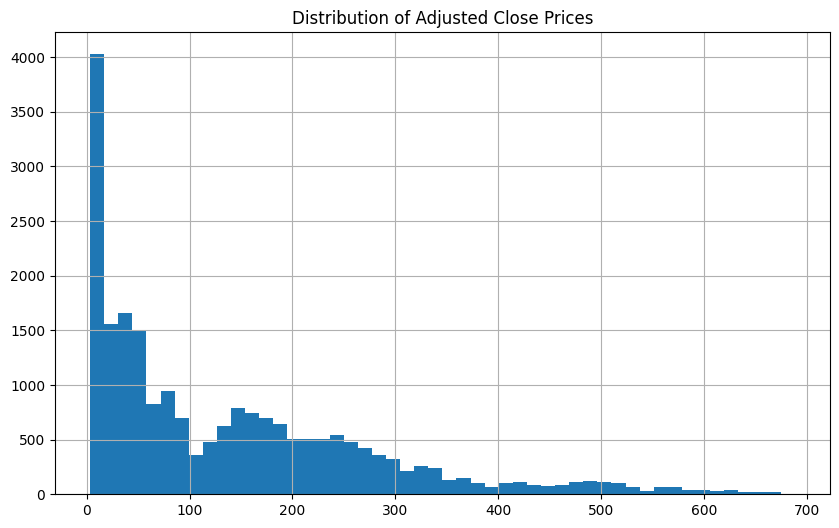

In [8]:

# Check for missing values
print("From multi-index data \n", data.isnull().sum())
print("From data_2D \n", data_2D.isnull().sum())

# Visualize the distribution of the target variable (e.g., Adj_Close)
import matplotlib.pyplot as plt

data_2D['Adj_Close'].hist(bins=50, figsize=(10, 6))
plt.title('Distribution of Adjusted Close Prices')
plt.show()

In [9]:
# Drop rows with any NaN values
data_2D = data_2D.dropna()

print(data_2D.isnull().sum())  # Ensure no NaNs remain
print(data_2D.head())

Date         0
Ticker       0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
        Date Ticker   Adj_Close       Close        High         Low  \
0 2018-01-02   AAPL   40.524345   43.064999   43.075001   42.314999   
1 2018-01-02   ADBE  177.699997  177.699997  177.800003  175.259995   
2 2018-01-02    CRM  103.830070  104.410004  104.699997  102.269997   
3 2018-01-02    DOX   58.145039   66.180000   66.250000   65.440002   
4 2018-01-02      F    8.875398   12.660000   12.660000   12.500000   

         Open       Volume  
0   42.540001  102223600.0  
1  175.850006    2432800.0  
2  102.879997    4669200.0  
3   65.500000     525300.0  
4   12.520000   20773300.0  


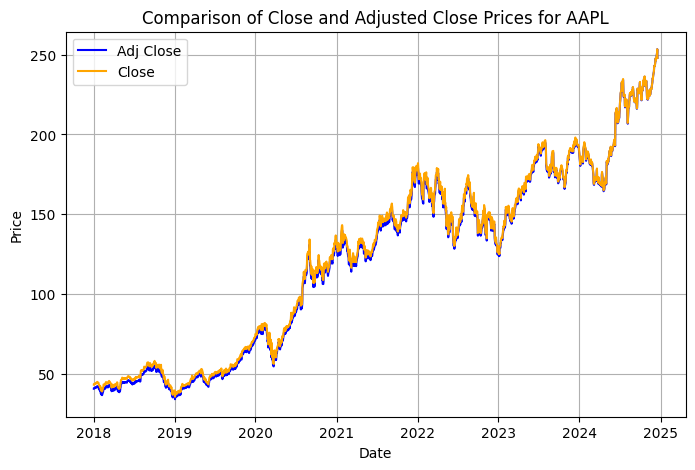

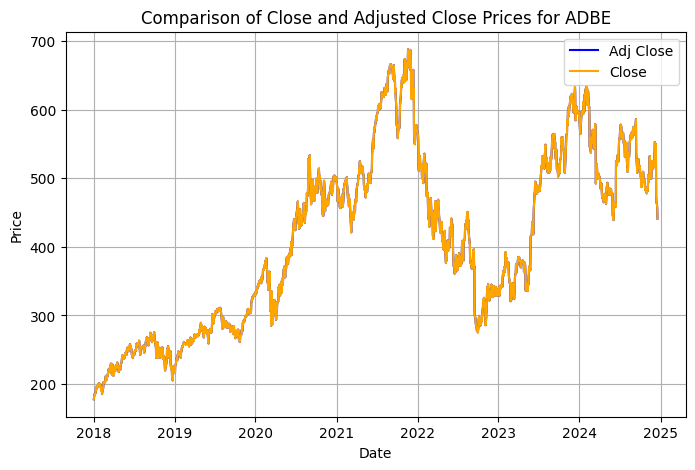

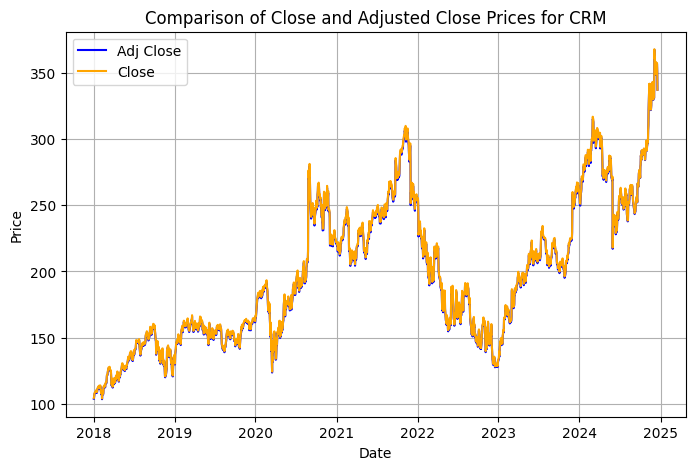

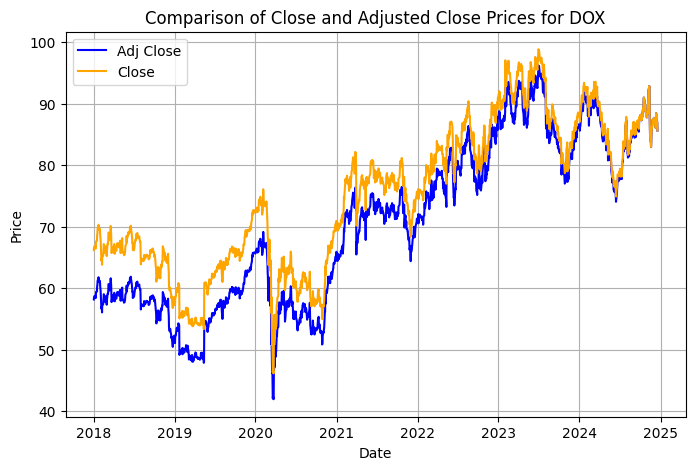

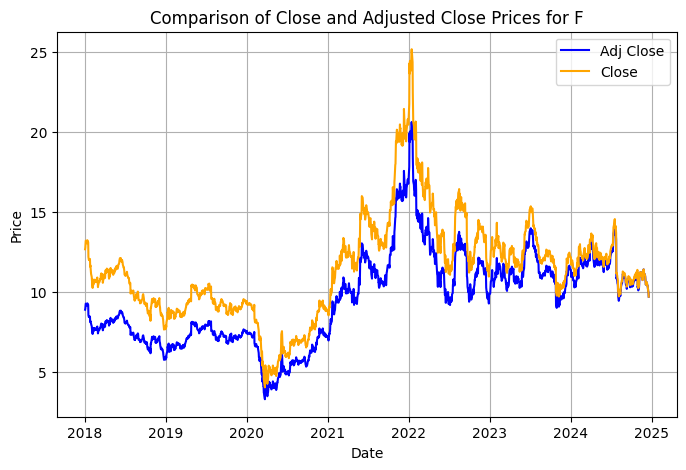

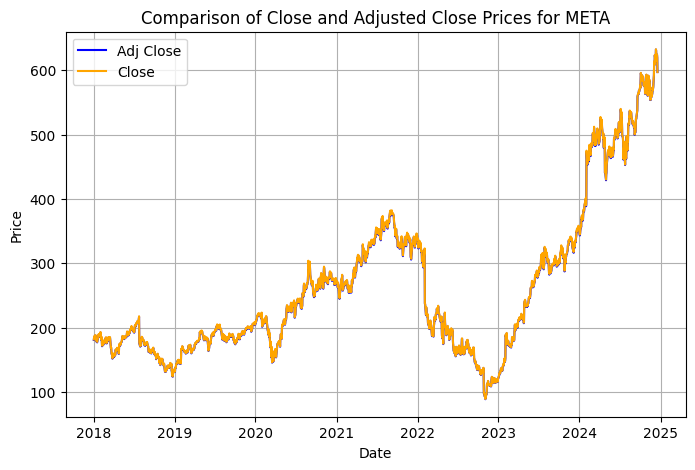

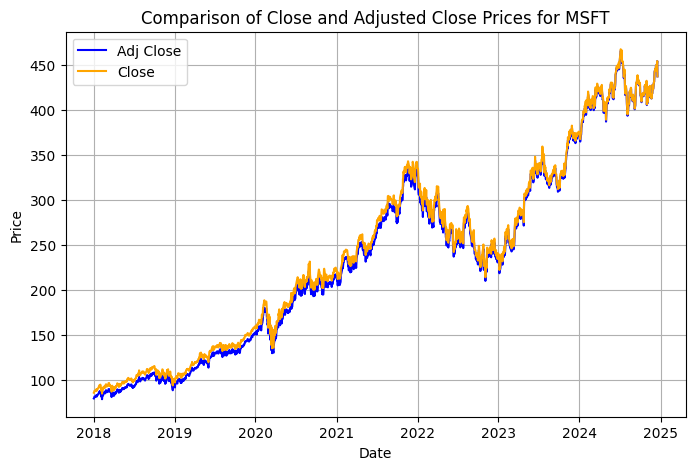

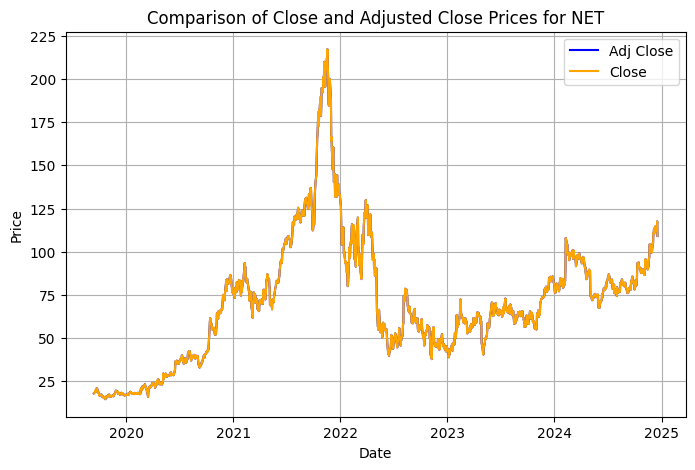

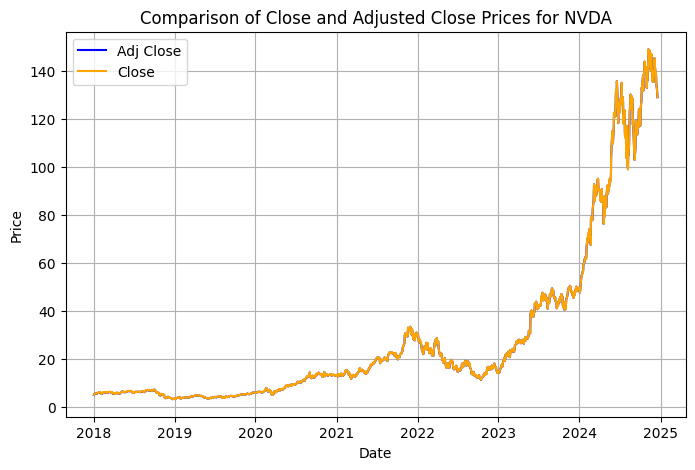

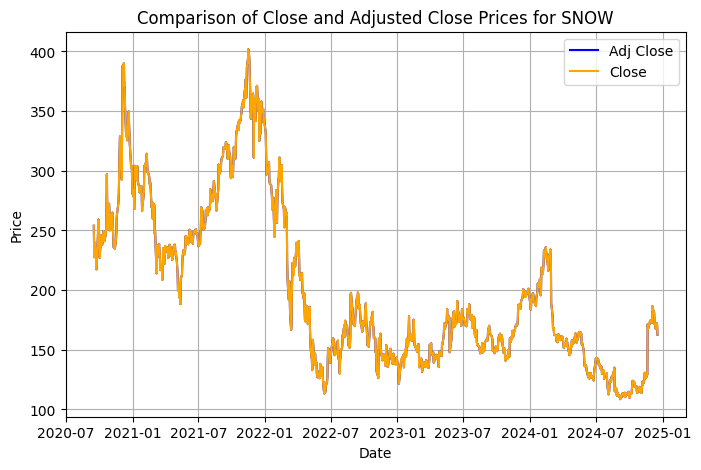

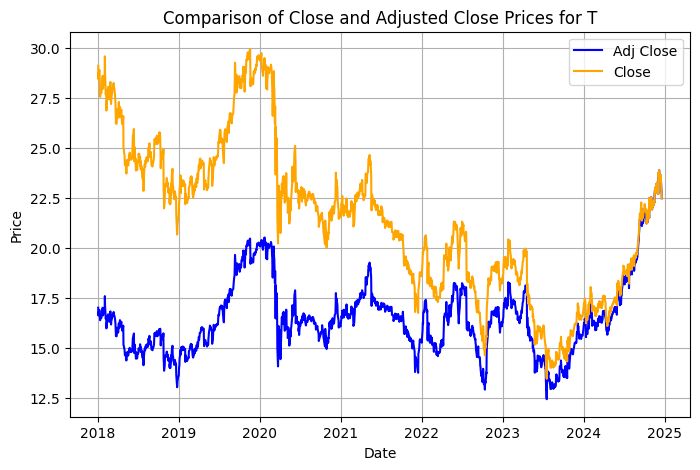

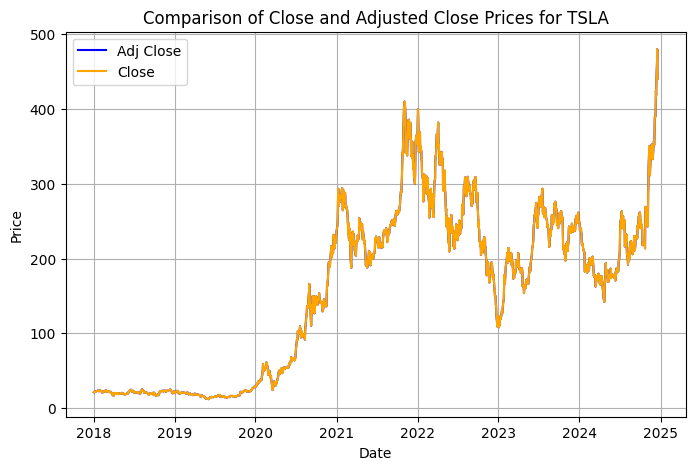

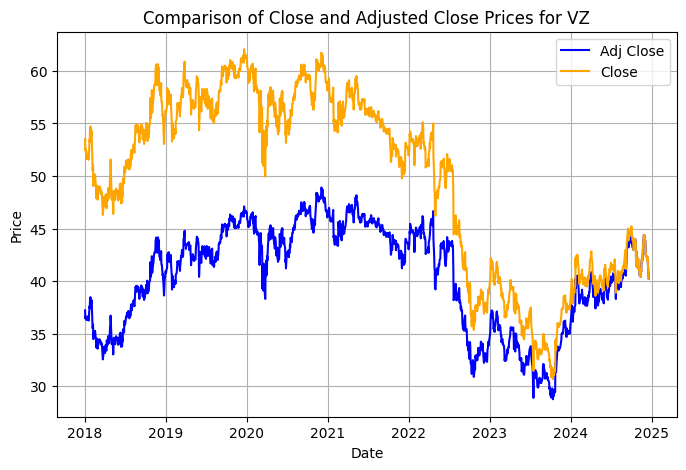

In [10]:
import matplotlib.pyplot as plt

# Group data by 'Ticker'
grouped = data_2D.groupby('Ticker')

# Iterate through each ticker and plot its data
for ticker, group in grouped:
    plt.figure(figsize=(8, 5))
    plt.plot(group['Date'], group['Adj_Close'], label='Adj Close', color='blue')
    plt.plot(group['Date'], group['Close'], label='Close', color='orange')
    plt.title(f'Comparison of Close and Adjusted Close Prices for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()
        

# Data Transform - Add feaures
- Encode tickers so I can keep adding tickers without adding complexity and keeping dataset compact
- Add Features
  - Date Features
    - day of the week
    - day of the month
    - is_holiday the day after
    - is_holiday the day before
    - year, month, day

  - Can I get the earnings reports?
    - days to the earning reports
    - days after the earning reporst
    - forecast?

In [11]:
data_transformed = data_2D.copy()

from sklearn.preprocessing import LabelEncoder
import pandas as pd

encoder = LabelEncoder()
data_transformed['Ticker_Encoded'] = encoder.fit_transform(data_transformed['Ticker'])
ticker_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))


In [12]:
from utils import transform_date
data_transformed = pd.concat([data_transformed, data_transformed['Date'].apply(transform_date).apply(pd.Series)], axis=1)
data_transformed.tail()

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume,Ticker_Encoded,year,month,day,weekday,is_day_before_a_holiday,is_day_after_a_holiday
22784,2024-12-18,NVDA,128.910004,128.910004,136.699997,128.279999,133.860001,275643200.0,8,2024,12,18,2,0,0
22785,2024-12-18,SNOW,162.589996,162.589996,170.500000,160.759995,170.429993,5143100.0,9,2024,12,18,2,0,0
22786,2024-12-18,T,22.480000,22.480000,22.990000,22.459999,22.799999,38879500.0,10,2024,12,18,2,0,0
22787,2024-12-18,TSLA,440.130005,440.130005,488.540009,427.010010,466.500000,147877000.0,11,2024,12,18,2,0,0
22788,2024-12-18,VZ,40.240002,40.240002,41.049999,40.209999,40.700001,19163700.0,12,2024,12,18,2,0,0


In [13]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

encoder = LabelEncoder()
data_transformed['Ticker_Encoded'] = encoder.fit_transform(data_transformed['Ticker'])
ticker_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
data_transformed


,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume,Ticker_Encoded,year,month,day,weekday,is_day_before_a_holiday,is_day_after_a_holiday
0,2018-01-02,AAPL,40.524345,43.064999,43.075001,42.314999,42.540001,102223600.0,0,2018,1,2,1,1,0
1,2018-01-02,ADBE,177.699997,177.699997,177.800003,175.259995,175.850006,2432800.0,1,2018,1,2,1,1,0
2,2018-01-02,CRM,103.830070,104.410004,104.699997,102.269997,102.879997,4669200.0,2,2018,1,2,1,1,0
3,2018-01-02,DOX,58.145039,66.180000,66.250000,65.440002,65.500000,525300.0,3,2018,1,2,1,1,0
4,2018-01-02,F,8.875398,12.660000,12.660000,12.500000,12.520000,20773300.0,4,2018,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22784,2024-12-18,NVDA,128.910004,128.910004,136.699997,128.279999,133.860001,275643200.0,8,2024,12,18,2,0,0
22785,2024-12-18,SNOW,162.589996,162.589996,170.500000,160.759995,170.429993,5143100.0,9,2024,12,18,2,0,0
22786,2024-12-18,T,22.480000,22.480000,22.990000,22.459999,22.799999,38879500.0,10,2024,12,18,2,0,0
22787,2024-12-18,TSLA,440.130005,440.130005,488.540009,427.010010,466.500000,147877000.0,11,2024,12,18,2,0,0


In [14]:
# Get historical earnings for AAPL
ticker = yf.Ticker("AAPL")
earnings = ticker.income_stmt  # Annual earnings
earnings


,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,NaN
Tax Rate For Calcs,0.240912,0.147192,0.162,0.133,NaN
Normalized EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,93736000000.0,96995000000.0,99803000000.0,94680000000.0,NaN
Reconciled Depreciation,11445000000.0,11519000000.0,11104000000.0,11284000000.0,NaN
Reconciled Cost Of Revenue,210352000000.0,214137000000.0,223546000000.0,212981000000.0,NaN
EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
EBIT,123216000000.0,114301000000.0,119437000000.0,111852000000.0,NaN
Net Interest Income,NaN,-183000000.0,-106000000.0,198000000.0,890000000.0
Interest Expense,NaN,3933000000.0,2931000000.0,2645000000.0,2873000000.0


**Note**: As yfinance was giving errors while trying to pull the earning reports, I swithched to use `Alpha Vantage`, this data source requires `API_KEY` which can be retrivable from their website: https://www.alphavantage.co/support/#api-key

Im only going to use it to recreate historical data, we will continue using `yfinance` for future earnings

In [15]:
from earnings import load_all_historical_earnings_to_dataframe

unique_tickers = data_transformed['Ticker'].unique()
past_earnings = load_all_historical_earnings_to_dataframe(symbols=unique_tickers)

past_earnings
# unique_tickers

LEGC: Loading historical data for T...
LEGC: Loading historical data for MSFT...
LEGC: Loading historical data for F...
LEGC: Loading historical data for TSLA...
LEGC: Loading historical data for AAPL...
LEGC: Loading historical data for DOX...
LEGC: Loading historical data for VZ...
LEGC: Loading historical data for CRM...
LEGC: Loading historical data for SNOW...
LEGC: Loading historical data for ADBE...
LEGC: Loading historical data for NET...
LEGC: Loading historical data for NVDA...
LEGC: Loading historical data for META...
LEGC: Combined historical earnings data into a single DataFrame.


,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime,symbol
0,2024-09-30,2024-10-23,0.6,0.57,0.03,5.2632,pre-market,T
1,2024-06-30,2024-07-24,0.57,0.57,0,0,pre-market,T
2,2024-03-31,2024-04-24,0.55,0.54,0.01,1.8519,pre-market,T
3,2023-12-31,2024-01-24,0.54,0.56,-0.02,-3.5714,pre-market,T
4,2023-09-30,2023-10-19,0.64,0.62,0.02,3.2258,pre-market,T
...,...,...,...,...,...,...,...,...
1125,2013-03-31,2013-05-01,0.12,0.13,-0.01,-7.6923,pre-market,META
1126,2012-12-31,2013-01-30,0.17,0.15,0.02,13.3333,pre-market,META
1127,2012-09-30,2012-10-23,0.12,0.11,0.01,9.0909,pre-market,META
1128,2012-06-30,2012-07-26,0.12,0.12,0,0,pre-market,META


In [16]:
past_earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fiscalDateEnding    1130 non-null   object
 1   reportedDate        1130 non-null   object
 2   reportedEPS         1130 non-null   object
 3   estimatedEPS        1130 non-null   object
 4   surprise            1130 non-null   object
 5   surprisePercentage  1130 non-null   object
 6   reportTime          1130 non-null   object
 7   symbol              1130 non-null   object
dtypes: object(8)
memory usage: 70.8+ KB


In [17]:
past_earnings['reportedDate'] = pd.to_datetime(past_earnings['reportedDate'])
past_earnings['fiscalDateEnding'] = pd.to_datetime(past_earnings['fiscalDateEnding'])
past_earnings.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime,symbol
0,2024-09-30,2024-10-23,0.6,0.57,0.03,5.2632,pre-market,T
1,2024-06-30,2024-07-24,0.57,0.57,0,0,pre-market,T
2,2024-03-31,2024-04-24,0.55,0.54,0.01,1.8519,pre-market,T
3,2023-12-31,2024-01-24,0.54,0.56,-0.02,-3.5714,pre-market,T
4,2023-09-30,2023-10-19,0.64,0.62,0.02,3.2258,pre-market,T


In [18]:
from earnings import load_all_upcoming_earnings_to_dataframe

unique_tickers = data_transformed['Ticker'].unique()
future_earnings = load_all_upcoming_earnings_to_dataframe(symbols=unique_tickers)

future_earnings

LEGC: Loading upcoming data for T from T.json...
LEGC: Loading upcoming data for MSFT from MSFT.json...
LEGC: Loading upcoming data for F from F.json...
LEGC: Loading upcoming data for TSLA from TSLA.json...
LEGC: Loading upcoming data for AAPL from AAPL.json...
LEGC: Loading upcoming data for DOX from DOX.json...
LEGC: Loading upcoming data for VZ from VZ.json...
LEGC: Loading upcoming data for CRM from CRM.json...
LEGC: Loading upcoming data for SNOW from SNOW.json...
LEGC: Loading upcoming data for ADBE from ADBE.json...
LEGC: Loading upcoming data for NET from NET.json...
LEGC: Loading upcoming data for NVDA from NVDA.json...
LEGC: Loading upcoming data for META from META.json...
LEGC: Combined upcoming earnings data loaded. Shape: (13, 9)


,Earnings Date Start,Earnings Date End,Earnings High,Earnings Low,Earnings Average,Revenue High,Revenue Low,Revenue Average,symbol
0,2025-01-27,2025-01-27,0.56000,0.47000,0.50430,32295000000,31427000000,31959129930,T
1,2025-01-28,2025-02-03,3.47000,3.03000,3.14627,70520000000,68488700000,68876283030,MSFT
2,2025-02-04,2025-02-10,0.43000,0.31000,0.34528,46922000000,41946000000,43889075000,F
3,2025-01-24,2025-02-03,0.96000,0.59000,0.76149,28928100000,25293000000,27418870650,TSLA
4,2025-01-30,2025-02-03,2.50000,2.19000,2.35593,129887000000,119563000000,124410526290,AAPL
5,2025-02-04,2025-02-10,1.67000,1.60000,1.63760,1116368000,1112200000,1114785960,DOX
6,2025-01-24,2025-01-24,1.17000,1.05925,1.10549,36050000000,34926000000,35351314630,VZ
7,2025-02-26,2025-03-03,2.72000,2.48000,2.61467,10178707000,9964635000,10036563430,CRM
8,2025-02-26,2025-03-03,0.27000,0.12000,0.17585,984000000,948900000,955732650,SNOW
9,2025-03-12,2025-03-17,5.03000,4.93000,4.97224,5730000000,5633000000,5664047550,ADBE


### Matching Fields Between Historical and Future Earnings

| **Field in Historical Data** | **Field in Future Data** | **Description**                                      |
|-------------------------------|--------------------------|------------------------------------------------------|
| `fiscalDateEnding`            | `Earnings Date`          | The date of the earnings report. Historical is actual; future is estimated. |
| `reportedEPS`                 | `Earnings Average`       | Earnings Per Share (EPS). Historical is reported; future is the average estimate. |
| `totalRevenue`                | `Revenue Average`        | Total revenue reported/estimated for the fiscal period. |

### Notes
- These fields are directly comparable across historical and future earnings data.
- Fields such as `Earnings High`, `Earnings Low`, `Revenue High`, and `Revenue Low` exist only in future data and may be added later for extended analysis.

In [19]:
# Unify the date (incomming and history earnings)
import pandas as pd

# Example historical and future dataframes
historical_df = past_earnings.copy()
future_df = future_earnings.copy()
data_df = data_transformed.copy()

print(future_df.info())
print(historical_df.info())
print(data_transformed.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Earnings Date Start  13 non-null     object 
 1   Earnings Date End    13 non-null     object 
 2   Earnings High        13 non-null     float64
 3   Earnings Low         13 non-null     float64
 4   Earnings Average     13 non-null     float64
 5   Revenue High         13 non-null     int64  
 6   Revenue Low          13 non-null     int64  
 7   Revenue Average      13 non-null     int64  
 8   symbol               13 non-null     object 
dtypes: float64(3), int64(3), object(3)
memory usage: 1.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fiscalDateEnding    1130 non-null   datetime64[ns]
 1   re

In [20]:
import pandas as pd

# Ensure proper column renaming and date formats
future_df.rename(columns={'symbol': 'Ticker'}, inplace=True)
historical_df.rename(columns={'symbol': 'Ticker'}, inplace=True)

future_df['Earnings Date Start'] = pd.to_datetime(future_df['Earnings Date Start'])
future_df['Earnings Date End'] = pd.to_datetime(future_df['Earnings Date End'])
historical_df['reportedDate'] = pd.to_datetime(historical_df['reportedDate'])
data_df['Date'] = pd.to_datetime(data_df['Date'])

# Step 1: Merge historical earnings into stock prices
merged_historical = pd.merge_asof(
    data_df.sort_values('Date'),
    historical_df.sort_values('reportedDate'),
    left_on='Date',
    right_on='reportedDate',
    by='Ticker',
    direction='backward'  # Matches the most recent past earnings report
)

# Calculate days after previous earnings
merged_historical['days_after_previous_earning'] = (
    merged_historical['Date'] - merged_historical['reportedDate']
).dt.days

# Step 2: Merge future earnings into stock prices
merged_future = pd.merge_asof(
    data_df.sort_values('Date'),
    future_df.sort_values('Earnings Date Start'),
    left_on='Date',
    right_on='Earnings Date Start',
    by='Ticker',
    direction='forward'  # Matches the closest upcoming earnings
)

# Calculate days to next earnings
merged_future['days_to_next_earning'] = (
    merged_future['Earnings Date Start'] - merged_future['Date']
).dt.days

# Step 3: Combine historical and future earnings data
final_merged = pd.merge(
    merged_historical,
    merged_future[['Date', 'Ticker', 'days_to_next_earning']],
    on=['Date', 'Ticker'],
    how='left'
)

# Clean up columns:
final_merged.drop(columns=['reportTime'], inplace=True)

# Convert object columns to float
columns_to_convert = ['reportedEPS', 'estimatedEPS', 'surprise', 'surprisePercentage']

for col in columns_to_convert:
    final_merged[col] = pd.to_numeric(final_merged[col], errors='coerce')  # Converts invalid entries to NaN

# Check the data types and any potential NaN values
print("\nUpdated Data Types:")
print(final_merged.dtypes)

print("\nSummary of Null Values After Conversion:")
print(final_merged.isnull().sum())

# Optional: Handle NaN values (if needed)
# Example: Fill with a default value or interpolate
final_merged[columns_to_convert] = final_merged[columns_to_convert].fillna(0)  # Replace NaN with 0

# Final structure
print("\nFinal Merged DataFrame Info:")
final_merged.info()

# Check for null values (optional)
null_summary = final_merged.isnull().sum()
print("\nNull Values Summary:")
print(null_summary)

# Sample rows for validation
print("\nSample Rows:")
print(final_merged.head())


Updated Data Types:
Date                           datetime64[ns]
Ticker                                 object
Adj_Close                             float64
Close                                 float64
High                                  float64
Low                                   float64
Open                                  float64
Volume                                float64
Ticker_Encoded                          int64
year                                    int64
month                                   int64
day                                     int64
weekday                                 int64
is_day_before_a_holiday                 int64
is_day_after_a_holiday                  int64
fiscalDateEnding               datetime64[ns]
reportedDate                   datetime64[ns]
reportedEPS                           float64
estimatedEPS                          float64
surprise                              float64
surprisePercentage                    float64
days_after_pr

In [21]:
# Create moving averages for Adj_Close
window_sizes = [5, 10, 20]  # You can adjust the window sizes as needed
for window in window_sizes:
    final_merged[f'ma_{window}'] = final_merged.groupby('Ticker')['Adj_Close'].transform(lambda x: x.rolling(window).mean())
    final_merged[f'volatility_{window}'] = final_merged.groupby('Ticker')['Adj_Close'].transform(lambda x: x.rolling(window).std())
    
final_merged['pct_change'] = final_merged.groupby('Ticker')['Adj_Close'].transform(lambda x: x.pct_change())
final_merged['high_low_spread'] = (final_merged['High'] - final_merged['Low']) / final_merged['Low']
  
final_merged.tail()

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume,Ticker_Encoded,year,...,days_after_previous_earning,days_to_next_earning,ma_5,volatility_5,ma_10,volatility_10,ma_20,volatility_20,pct_change,high_low_spread
21676,2024-12-18,ADBE,441.309998,441.309998,455.250000,441.100006,453.239990,6503900.0,1,2024,...,7,84,459.678003,12.452958,503.447998,47.022754,509.657999,33.725943,-0.030578,0.032079
21677,2024-12-18,AAPL,248.050003,248.050003,254.279999,247.740005,252.160004,56632600.0,0,2024,...,48,43,249.732001,2.464436,247.555000,3.204779,241.418999,7.618112,-0.021422,0.026399
21678,2024-12-18,TSLA,440.130005,440.130005,488.540009,427.010010,466.500000,147877000.0,11,2024,...,56,37,447.467999,24.154310,421.159998,34.782128,383.357001,45.968697,-0.082795,0.144095
21679,2024-12-18,META,597.190002,597.190002,627.359985,596.320007,621.000000,17032000.0,5,2024,...,49,43,618.200305,12.531216,618.677441,10.374136,598.614392,25.939739,-0.035920,0.052053
21680,2024-12-18,VZ,40.240002,40.240002,41.049999,40.209999,40.700001,19163700.0,12,2024,...,57,37,41.252000,0.884262,41.783000,0.824177,42.648500,1.203356,-0.013242,0.020890


In [22]:
final_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21681 entries, 0 to 21680
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         21681 non-null  datetime64[ns]
 1   Ticker                       21681 non-null  object        
 2   Adj_Close                    21681 non-null  float64       
 3   Close                        21681 non-null  float64       
 4   High                         21681 non-null  float64       
 5   Low                          21681 non-null  float64       
 6   Open                         21681 non-null  float64       
 7   Volume                       21681 non-null  float64       
 8   Ticker_Encoded               21681 non-null  int64         
 9   year                         21681 non-null  int64         
 10  month                        21681 non-null  int64         
 11  day                          21681 non-nu

# Train - Test Split

In [23]:
""" 
valid_data = 15%
test_data = 15%
train_data = 70%
"""

train_split = int(0.7 * len(final_merged))  # 70% for training
valid_split = int(0.85 * len(final_merged))  # 15% for validation (remaining half of the 30% split)

# Perform splits based on index ranges (no shuffling)
train_data = final_merged.iloc[:train_split]
validation_data = final_merged.iloc[train_split:valid_split]
test_data = final_merged.iloc[valid_split:]

# Separate features and target for all splits
X_train = train_data.drop(columns=['Adj_Close', 'Date', 'Ticker', 'fiscalDateEnding', 'reportedDate'])
y_train = train_data['Adj_Close']

X_valid = validation_data.drop(columns=['Adj_Close', 'Date', 'Ticker', 'fiscalDateEnding', 'reportedDate'])
y_valid = validation_data['Adj_Close']

X_test = test_data.drop(columns=['Adj_Close', 'Date', 'Ticker', 'fiscalDateEnding', 'reportedDate'])
y_test = test_data['Adj_Close']

# Handle missing values
for column in X_train.columns:
    X_train[column].fillna(X_train[column].mean(), inplace=True)
    X_valid[column].fillna(X_train[column].mean(), inplace=True)
    X_test[column].fillna(X_train[column].mean(), inplace=True)

/var/folders/sl/kpl6n5j90zg8bxc7vtmmktdc0000gn/T/ipykernel_97317/1577522863.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[column].fillna(X_train[column].mean(), inplace=True)
/var/folders/sl/kpl6n5j90zg8bxc7vtmmktdc0000gn/T/ipykernel_97317/1577522863.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [24]:
print(X_train.dtypes)

Close                          float64
High                           float64
Low                            float64
Open                           float64
Volume                         float64
Ticker_Encoded                   int64
year                             int64
month                            int64
day                              int64
weekday                          int64
is_day_before_a_holiday          int64
is_day_after_a_holiday           int64
reportedEPS                    float64
estimatedEPS                   float64
surprise                       float64
surprisePercentage             float64
days_after_previous_earning      int64
days_to_next_earning             int64
ma_5                           float64
volatility_5                   float64
ma_10                          float64
volatility_10                  float64
ma_20                          float64
volatility_20                  float64
pct_change                     float64
high_low_spread          

In [25]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()

# Fit scaler on training data
X_train_scaled = scaler.fit_transform(X_train)

# # Save scaler to a file
# joblib.dump(scaler, "scaler.pkl")

# Transform validation and test data
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

# Baseline

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

MAE: 1.9350920415175248
MSE: 6.13976678576421
R2 Score: 0.9997996293990388


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model_r = LinearRegression()

# Train the model
model_r.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model_r.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")


MAE: 1.9350920415175248
MSE: 6.13976678576421
R2 Score: 0.9997996293990388


	•	MAE (Mean Absolute Error): 1.90 – On average, the model’s predictions deviate by approximately 2 units from the actual adjusted close prices.
	•	MSE (Mean Squared Error): 6.06 – The squared error (penalizing larger deviations more heavily) is still quite low.
	•	R² Score: 0.9998 – Your model explains nearly all the variability in the target variable.

In [28]:
# Lets Validate the model against unseen data:

# Predict on the validation set
y_valid_pred = model.predict(X_valid_scaled)

# Evaluate the model on validation data
mae_valid = mean_absolute_error(y_valid, y_valid_pred)
mse_valid = mean_squared_error(y_valid, y_valid_pred)
r2_valid = r2_score(y_valid, y_valid_pred)

print(f"Validation MAE: {mae_valid}")
print(f"Validation MSE: {mse_valid}")
print(f"Validation R2 Score: {r2_valid}")

Validation MAE: 1.4407997371372292
Validation MSE: 3.5886989198255788
Validation R2 Score: 0.9997991778714415


	1.	Validation MAE (1.48):
	•	This means the average absolute difference between the predicted and actual Adjusted Close prices is about 1.63. For stock prices, this level of error is quite low, depending on the price ranges in your dataset.
	2.	Validation MSE (3.63):
	•	The Mean Squared Error measures the average squared difference between predicted and actual values. A lower MSE indicates fewer large errors, which is crucial in stock price prediction.
	3.	Validation R² (0.9997):
	•	An R² score very close to 1 indicates that the model explains almost all the variance in the validation data. This is a sign of an excellent fit.

# Introducing Ramdon Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=None,    # Maximum depth of the tree
    random_state=42,   # Ensures reproducibility
    n_jobs=-1          # Use all CPU cores
)

# Train Random Forest on raw training data (no scaling)
rf_model.fit(X_train, y_train)

# Predict on validation set
y_valid_pred = rf_model.predict(X_valid)

# Evaluate Random Forest model
valid_mae = mean_absolute_error(y_valid, y_valid_pred)
valid_mse = mean_squared_error(y_valid, y_valid_pred)
valid_r2 = r2_score(y_valid, y_valid_pred)

print(f"Validation MAE: {valid_mae}")
print(f"Validation MSE: {valid_mse}")
print(f"Validation R2 Score: {valid_r2}")

Validation MAE: 0.8619250634001041
Validation MSE: 1.5388121427082002
Validation R2 Score: 0.9999138886998173


### Compare results:

| **Metric**         | **Linear Regression** | **Random Forest**   |
|---------------------|-----------------------|---------------------|
| **Validation MAE**  | 1.48                  | **0.877**          |
| **Validation MSE**  | 3.63                  | **1.45619**          |
| **Validation R²**   | 0.99976               | **0.99991**         |

Key Takeaways
1.	Lower MAE and MSE:
Random Forest has substantially reduced the mean absolute and mean squared errors, indicating better prediction accuracy.
2.	Higher R² Score:
The higher R² score indicates that the Random Forest model is explaining more variability in the data.
3.	Handling Complexity:
Random Forest captures non-linear relationships and interactions between features better than Linear Regression, which assumes linear relationships.

In [30]:

import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(model_r, 'linear_regression_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [31]:
import json

ticker_mapping = dict(zip(final_merged["Ticker"].unique(), final_merged["Ticker_Encoded"].unique()))

# Convert numpy types to native Python types
ticker_mapping = {key: int(value) for key, value in ticker_mapping.items()}

# Save the mapping to a JSON file
import json
with open("ticker_mapping.json", "w") as file:
    json.dump(ticker_mapping, file)


# Just Another Manual Test

In [32]:
import pandas as pd
from utils import predict  # Import your data preparation function

# Set up the symbol and date for prediction
today = pd.Timestamp("today").normalize()
future_date = today + pd.Timedelta(days=20)

for symbol in symbols:
    print(predict(symbol, future_date))


[*********************100%***********************]  1 of 1 completed


Stock Symbol: AAPL
Date: 2024-12-18 00:00:00
Close Price: $248.05
Adjusted Close Price: $248.05


[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


LEGC: Loaded historical earnings data for AAPL into DataFrame.
LEGC: Loaded upcoming earnings data for AAPL into DataFrame.
Predicted Adjusted Close for AAPL on 2025-01-08 (Random Forest): 247.93917495727538
Predicted Adjusted Close for AAPL on 2025-01-08 (Linear Regression): 447.4212046416101
{'most_recent_data': {'date': Timestamp('2024-12-18 00:00:00'), 'close': 248.0500030517578, 'adj_close': 248.0500030517578}, 'ramdom_forest': 247.93917495727538, 'linear_regression': 447.4212046416101, 'date': datetime.date(2025, 1, 8)}


[*********************100%***********************]  1 of 1 completed


Stock Symbol: NET
Date: 2024-12-18 00:00:00
Close Price: $109.10
Adjusted Close Price: $109.10


[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
[*********************100%***********************] 

LEGC: Loaded historical earnings data for NET into DataFrame.
LEGC: Loaded upcoming earnings data for NET into DataFrame.
Predicted Adjusted Close for NET on 2025-01-08 (Random Forest): 109.0596639251709
Predicted Adjusted Close for NET on 2025-01-08 (Linear Regression): 331.43475087594635
{'most_recent_data': {'date': Timestamp('2024-12-18 00:00:00'), 'close': 109.0999984741211, 'adj_close': 109.0999984741211}, 'ramdom_forest': 109.0596639251709, 'linear_regression': 331.43475087594635, 'date': datetime.date(2025, 1, 8)}
Stock Symbol: SNOW
Date: 2024-12-18 00:00:00
Close Price: $162.59
Adjusted Close Price: $162.59


[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


LEGC: Loaded historical earnings data for SNOW into DataFrame.
LEGC: Loaded upcoming earnings data for SNOW into DataFrame.
Predicted Adjusted Close for SNOW on 2025-01-08 (Random Forest): 160.09834106445314
Predicted Adjusted Close for SNOW on 2025-01-08 (Linear Regression): 420.36206767763474
{'most_recent_data': {'date': Timestamp('2024-12-18 00:00:00'), 'close': 162.58999633789062, 'adj_close': 162.58999633789062}, 'ramdom_forest': 160.09834106445314, 'linear_regression': 420.36206767763474, 'date': datetime.date(2025, 1, 8)}


[*********************100%***********************]  1 of 1 completed


Stock Symbol: MSFT
Date: 2024-12-18 00:00:00
Close Price: $437.39
Adjusted Close Price: $437.39


[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


LEGC: Loaded historical earnings data for MSFT into DataFrame.
LEGC: Loaded upcoming earnings data for MSFT into DataFrame.
Predicted Adjusted Close for MSFT on 2025-01-08 (Random Forest): 437.0799035644531
Predicted Adjusted Close for MSFT on 2025-01-08 (Linear Regression): 894.7611886178867
{'most_recent_data': {'date': Timestamp('2024-12-18 00:00:00'), 'close': 437.3900146484375, 'adj_close': 437.3900146484375}, 'ramdom_forest': 437.0799035644531, 'linear_regression': 894.7611886178867, 'date': datetime.date(2025, 1, 8)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: META
Date: 2024-12-18 00:00:00
Close Price: $597.19
Adjusted Close Price: $597.19
LEGC: Loaded historical earnings data for META into DataFrame.
LEGC: Loaded upcoming earnings data for META into DataFrame.
Predicted Adjusted Close for META on 2025-01-08 (Random Forest): 604.3376104736328
Predicted Adjusted Close for META on 2025-01-08 (Linear Regression): 1504.3000516537716
{'most_recent_data': {'date': Timestamp('2024-12-18 00:00:00'), 'close': 597.1900024414062, 'adj_close': 597.1900024414062}, 'ramdom_forest': 604.3376104736328, 'linear_regression': 1504.3000516537716, 'date': datetime.date(2025, 1, 8)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: TSLA
Date: 2024-12-18 00:00:00
Close Price: $440.13
Adjusted Close Price: $440.13
LEGC: Loaded historical earnings data for TSLA into DataFrame.
LEGC: Loaded upcoming earnings data for TSLA into DataFrame.
Predicted Adjusted Close for TSLA on 2025-01-08 (Random Forest): 440.14109375
Predicted Adjusted Close for TSLA on 2025-01-08 (Linear Regression): 2214.6544621095995
{'most_recent_data': {'date': Timestamp('2024-12-18 00:00:00'), 'close': 440.1300048828125, 'adj_close': 440.1300048828125}, 'ramdom_forest': 440.14109375, 'linear_regression': 2214.6544621095995, 'date': datetime.date(2025, 1, 8)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: DOX
Date: 2024-12-18 00:00:00
Close Price: $85.61
Adjusted Close Price: $85.61
LEGC: Loaded historical earnings data for DOX into DataFrame.
LEGC: Loaded upcoming earnings data for DOX into DataFrame.
Predicted Adjusted Close for DOX on 2025-01-08 (Random Forest): 83.63651824951172
Predicted Adjusted Close for DOX on 2025-01-08 (Linear Regression): 154.2187481453633
{'most_recent_data': {'date': Timestamp('2024-12-18 00:00:00'), 'close': 85.61000061035156, 'adj_close': 85.61000061035156}, 'ramdom_forest': 83.63651824951172, 'linear_regression': 154.2187481453633, 'date': datetime.date(2025, 1, 8)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: CRM
Date: 2024-12-18 00:00:00
Close Price: $337.23
Adjusted Close Price: $337.23
LEGC: Loaded historical earnings data for CRM into DataFrame.
LEGC: Loaded upcoming earnings data for CRM into DataFrame.
Predicted Adjusted Close for CRM on 2025-01-08 (Random Forest): 336.72948577880857
Predicted Adjusted Close for CRM on 2025-01-08 (Linear Regression): 904.7774652549671
{'most_recent_data': {'date': Timestamp('2024-12-18 00:00:00'), 'close': 337.2300109863281, 'adj_close': 337.2300109863281}, 'ramdom_forest': 336.72948577880857, 'linear_regression': 904.7774652549671, 'date': datetime.date(2025, 1, 8)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Stock Symbol: ADBE
Date: 2024-12-18 00:00:00
Close Price: $441.31
Adjusted Close Price: $441.31



/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


LEGC: Loaded historical earnings data for ADBE into DataFrame.
LEGC: Loaded upcoming earnings data for ADBE into DataFrame.
Predicted Adjusted Close for ADBE on 2025-01-08 (Random Forest): 441.3677938842773
Predicted Adjusted Close for ADBE on 2025-01-08 (Linear Regression): 865.3161616957765
{'most_recent_data': {'date': Timestamp('2024-12-18 00:00:00'), 'close': 441.30999755859375, 'adj_close': 441.30999755859375}, 'ramdom_forest': 441.3677938842773, 'linear_regression': 865.3161616957765, 'date': datetime.date(2025, 1, 8)}


[*********************100%***********************]  1 of 1 completed


Stock Symbol: F
Date: 2024-12-18 00:00:00
Close Price: $9.69
Adjusted Close Price: $9.69


[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


LEGC: Loaded historical earnings data for F into DataFrame.
LEGC: Loaded upcoming earnings data for F into DataFrame.
Predicted Adjusted Close for F on 2025-01-08 (Random Forest): 9.694695701599121
Predicted Adjusted Close for F on 2025-01-08 (Linear Regression): 19.424044759368755
{'most_recent_data': {'date': Timestamp('2024-12-18 00:00:00'), 'close': 9.6899995803833, 'adj_close': 9.6899995803833}, 'ramdom_forest': 9.694695701599121, 'linear_regression': 19.424044759368755, 'date': datetime.date(2025, 1, 8)}


[*********************100%***********************]  1 of 1 completed


Stock Symbol: T
Date: 2024-12-18 00:00:00
Close Price: $22.48
Adjusted Close Price: $22.48


[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


LEGC: Loaded historical earnings data for T into DataFrame.
LEGC: Loaded upcoming earnings data for T into DataFrame.
Predicted Adjusted Close for T on 2025-01-08 (Random Forest): 22.33275218963623
Predicted Adjusted Close for T on 2025-01-08 (Linear Regression): 41.499876275249164
{'most_recent_data': {'date': Timestamp('2024-12-18 00:00:00'), 'close': 22.479999542236328, 'adj_close': 22.479999542236328}, 'ramdom_forest': 22.33275218963623, 'linear_regression': 41.499876275249164, 'date': datetime.date(2025, 1, 8)}


[*********************100%***********************]  1 of 1 completed


Stock Symbol: VZ
Date: 2024-12-18 00:00:00
Close Price: $40.24
Adjusted Close Price: $40.24


[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


LEGC: Loaded historical earnings data for VZ into DataFrame.
LEGC: Loaded upcoming earnings data for VZ into DataFrame.
Predicted Adjusted Close for VZ on 2025-01-08 (Random Forest): 39.17099304199219
Predicted Adjusted Close for VZ on 2025-01-08 (Linear Regression): 68.99532865057958
{'most_recent_data': {'date': Timestamp('2024-12-18 00:00:00'), 'close': 40.2400016784668, 'adj_close': 40.2400016784668}, 'ramdom_forest': 39.17099304199219, 'linear_regression': 68.99532865057958, 'date': datetime.date(2025, 1, 8)}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/luis_cardenas/work/python/machine-learning/Udacity-Capstone-Project/utils.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_df[column] = historical_df[column].fillna(method='ffill')
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Users/luis_cardenas/miniforge3/lib/python3.10/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=or

Stock Symbol: NVDA
Date: 2024-12-18 00:00:00
Close Price: $128.91
Adjusted Close Price: $128.91
LEGC: Loaded historical earnings data for NVDA into DataFrame.
LEGC: Loaded upcoming earnings data for NVDA into DataFrame.
Predicted Adjusted Close for NVDA on 2025-01-08 (Random Forest): 128.04293426513672
Predicted Adjusted Close for NVDA on 2025-01-08 (Linear Regression): 386.70660668105256
{'most_recent_data': {'date': Timestamp('2024-12-18 00:00:00'), 'close': 128.91000366210938, 'adj_close': 128.91000366210938}, 'ramdom_forest': 128.04293426513672, 'linear_regression': 386.70660668105256, 'date': datetime.date(2025, 1, 8)}


# Save everything to S3


In [ ]:

BUCKET = "capstone-stock-predictable-project"
!aws s3 cp random_forest_model.pkl s3://{BUCKET}/random_forest_model.pkl
!aws s3 cp linear_regression_model.pkl s3://{BUCKET}/linear_regression_model.pkl
!aws s3 cp scaler.pkl s3://{BUCKET}/scaler.pkl
!aws s3 cp ticker_mapping.json s3://{BUCKET}/ticker_mapping.json


upload: ./random_forest_model.pkl to s3://capstone-stock-predictable-project/random_forest_model.pkl
upload: ./linear_regression_model.pkl to s3://capstone-stock-predictable-project/linear_regression_model.pkl
upload: ./scaler.pkl to s3://capstone-stock-predictable-project/scaler.pkl
upload: ./ticker_mapping.json to s3://capstone-stock-predictable-project/ticker_mapping.json


# Deployment:
- Currently it's deployed in ECS as a lightweight Flask application
- It's open with no authentication

### Resources used:
```❯ ./create_resources.sh
Checking for existing VPC...
VPC ID: vpc-0d6faf0971ec86cdc
Checking for IAM Execution Role...
Creating IAM Execution Role...
Execution Role created: arn:aws:iam::072298625118:role/stock_predictor_execution_role
Checking for Execution Role Inline Policy...
Attaching inline policy to IAM Execution Role...
Inline policy attached to Execution Role.
Checking for IAM Task Role...
Creating IAM Task Role...
Task Role created: arn:aws:iam::072298625118:role/stock_predictor_task_role
Attaching inline policy to IAM Task Role...
Inline policy attached to Task Role.
Checking for existing Private Subnets...
Private Subnet 1: subnet-0fe65d113e7eb576c
Private Subnet 2: subnet-0d31c67048e4006d5
Checking for existing Public Subnets...
Public Subnet 1: subnet-04d419c18a9e57b2f
Public Subnet 2: subnet-0808db0ef9c245e6f
Setting up Internet Gateway...
Internet Gateway ID: igw-002d910b75e4dfebb
Checking for ALB Security Group...
ALB Security Group ID: sg-07da11b965d90f21a
Checking for ECS Security Group...
ECS Security Group ID: sg-0027e475625ede9fe
Checking for ALB...
ALB does not exist. Creating ALB...
ALB created: arn:aws:elasticloadbalancing:us-east-1:072298625118:loadbalancer/app/flask-app-alb/74d226fb9f0f29d1
Checking for Target Group...
Target Group does not exist. Creating Target Group...
Target Group created: arn:aws:elasticloadbalancing:us-east-1:072298625118:targetgroup/flask-ecs-target-group/cea7d45facce26c3
Checking for Listener...
Creating Listener for ALB...
Listener created: arn:aws:elasticloadbalancing:us-east-1:072298625118:listener/app/flask-app-alb/74d226fb9f0f29d1/8e36e08a4fd3e82a
Checking for ECS Cluster...
ECS Cluster already exists and is ACTIVE.
Registering Task Definition...
Task Definition ARN: arn:aws:ecs:us-east-1:072298625118:task-definition/flask-ecs-task:28
Creating ECS Service...
ECS Service created: arn:aws:ecs:us-east-1:072298625118:service/flask-ecs-cluster/flask-ecs-service
Final Summary:
VPC ID: vpc-0d6faf0971ec86cdc
Subnets: subnet-04d419c18a9e57b2f, subnet-0808db0ef9c245e6f, subnet-0fe65d113e7eb576c, subnet-0d31c67048e4006d5
Internet Gateway ID: igw-002d910b75e4dfebb
Security Groups: ALB=sg-07da11b965d90f21a, ECS=sg-0027e475625ede9fe
ALB ARN: arn:aws:elasticloadbalancing:us-east-1:072298625118:loadbalancer/app/flask-app-alb/74d226fb9f0f29d1
Target Group ARN: arn:aws:elasticloadbalancing:us-east-1:072298625118:targetgroup/flask-ecs-target-group/cea7d45facce26c3
Listener ARN: arn:aws:elasticloadbalancing:us-east-1:072298625118:listener/app/flask-app-alb/74d226fb9f0f29d1/8e36e08a4fd3e82a
ECS Cluster: flask-ecs-cluster
Task Definition ARN: arn:aws:ecs:us-east-1:072298625118:task-definition/flask-ecs-task:28
ECS Service ARN: arn:aws:ecs:us-east-1:072298625118:service/flask-ecs-cluster/flask-ecs-service```
  

In [34]:
# We need to update the model in the flask container everytime we train the models
!curl -X PATCH http://flask-app-alb-1663822479.us-east-1.elb.amazonaws.com/update_models | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    43  100    43    0     0     12      0  0:00:03  0:00:03 --:--:--    12
{
  "message": "Models updated successfully!"
}


In [35]:
import requests
import json

base_url = "http://flask-app-alb-1663822479.us-east-1.elb.amazonaws.com/predict"

for symbol in symbols:
    response = requests.get(f"{base_url}/{symbol}")
    data = response.json()
    print(json.dumps(data, indent=4))

{
    "date": "Thu, 19 Dec 2024 00:00:00 GMT",
    "linear_regression": 447.694,
    "most_recent_data": {
        "adj_close": 248.05,
        "close": 248.05,
        "date": "Wed, 18 Dec 2024 00:00:00 GMT"
    },
    "ramdom_forest": 247.969,
    "symbol": "AAPL"
}
{
    "date": "Thu, 19 Dec 2024 00:00:00 GMT",
    "linear_regression": 331.708,
    "most_recent_data": {
        "adj_close": 109.1,
        "close": 109.1,
        "date": "Wed, 18 Dec 2024 00:00:00 GMT"
    },
    "ramdom_forest": 109.079,
    "symbol": "NET"
}
{
    "date": "Thu, 19 Dec 2024 00:00:00 GMT",
    "linear_regression": 420.635,
    "most_recent_data": {
        "adj_close": 162.59,
        "close": 162.59,
        "date": "Wed, 18 Dec 2024 00:00:00 GMT"
    },
    "ramdom_forest": 161.713,
    "symbol": "SNOW"
}
{
    "date": "Thu, 19 Dec 2024 00:00:00 GMT",
    "linear_regression": 895.034,
    "most_recent_data": {
        "adj_close": 437.39,
        "close": 437.39,
        "date": "Wed, 18 Dec 2024 0